# Logistic regression

Welcome to our practical notebook on Logistic Regression. In this session, you will:

Dive into the fundamentals of Logistic Regression, a cornerstone algorithm for binary classification.
Implement the Logistic Regression algorithm from scratch, enhancing your understanding of its inner workings.
Apply this knowledge to a real dataset, practicing data preprocessing, model implementation, and performance evaluation.
This hands-on experience aims to equip you with the skills to use Logistic Regression effectively in solving classification problems. Let's get started on this exciting journey into machine learning!

Our dataset (`microchip_test.csv`)

In our exploration of machine learning, we will dive into the fascinating world of classification through a practical dataset known as the "Microchip Test" dataset. This dataset comprises results from two critical tests performed on a series of microchips. Each microchip undergoes Test 1 and Test 2, which measure specific attributes or performance metrics critical for determining the chip's quality. Based on these tests, each microchip is then classified as either "Accepted" or "Rejected," represented by 1 and 0, respectively. Our objective will be to use this data to build a predictive model. This model will learn from the test results to accurately predict whether new microchips meet the quality standards. Through this hands-on experience, you'll gain insights into the principles of logistic regression and binary classification, enhancing your understanding of how machine learning can be applied to solve real-world problems in quality control and beyond.

Load the dataset

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('./microchip_test.csv')
data

,test1,test2,accepted
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


Make some observations on your dataset, you can use the describe function

In [4]:
data.describe()

,test1,test2,accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


Compute the number of samples per class

In [27]:
data['accepted'].sum(), len(data['accepted'])

(58, 118)

Plot you data (scatter plot)

x: test1

y: test2

color of each datapoint: label

In [6]:
import plotly.express as px

In [7]:
# Plot using Plotly Express
fig = px.scatter(data, x='test1', y='test2', color='accepted',
                 color_continuous_scale=['yellow', 'blue'],  # Custom color scale for 'Rejected' and 'Accepted'
                 labels={'Accepted': 'Microchip Test Result'},
                 hover_data=['test1', 'test2'])  # Show these values on hover

fig.update_traces(marker=dict(size=10, line=dict(width=2,
                                                 color='DarkSlateGrey')),  # Customize marker appearance
                  selector=dict(mode='markers'))  # Apply customization to scatter plot markers only

fig.update_layout(title='Microchip Tests Result',
                  xaxis_title='Microchip Test 1',
                  yaxis_title='Microchip Test 2',
                  legend_title='Result',
                  coloraxis_colorbar=dict(title='Accepted', tickvals=[0,1], ticktext=['Rejected', 'Accepted']))

fig.show()

Split the dataset, to extract the features and the label and convert to numpy

In [9]:
X = data[['test1', 'test2']].to_numpy()
y = data['accepted'].to_numpy()

Build the Logistic regression model from sklearn

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
model

LogisticRegression()

Fit your LR model

In [12]:
model.fit(X, y)

LogisticRegression()

display the parameters of the model

In [16]:
model.intercept_, model.coef_

(array([-0.0174072]), array([[-0.26541433, -0.01162176]]))

Write a function that is building the prediction of the model manually

In [17]:
import numpy as np

def make_pred(x: np.array, model: LogisticRegression) -> float:
    theta1 = model.coef_[:, 0].item()
    theta2 = model.coef_[:, 1].item()
    intercept = model.intercept_.item()

    out = intercept + theta1 * x[:, 0] + theta2 * x[:, 1]
    return 1 / (1 + np.exp(-out))

In [18]:
make_pred(np.array([[1, 1]]), model)

array([0.42691643])

In [19]:
make_pred(np.array([[0,1, 0.1]]), model)

array([0.49274327])

now give the prediction on all the training dataset

- Call the function for the prediction
- Call the function to get the probalities

In [23]:
model.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0])

In [22]:
model.predict_proba(X)

array([[0.50978483, 0.49021517],
       [0.50018809, 0.49981191],
       [0.4921833 , 0.5078167 ],
       [0.48093753, 0.51906247],
       [0.47167906, 0.52832094],
       [0.47017643, 0.52982357],
       [0.47805435, 0.52194565],
       [0.48350298, 0.51649702],
       [0.50428564, 0.49571436],
       [0.51160934, 0.48839066],
       [0.52825061, 0.47174939],
       [0.53789096, 0.46210904],
       [0.54590294, 0.45409706],
       [0.55250618, 0.44749382],
       [0.54194246, 0.45805754],
       [0.52738294, 0.47261706],
       [0.51695645, 0.48304355],
       [0.50362809, 0.49637191],
       [0.49487946, 0.50512054],
       [0.47445265, 0.52554735],
       [0.46596856, 0.53403144],
       [0.46368587, 0.53631413],
       [0.46501719, 0.53498281],
       [0.47563874, 0.52436126],
       [0.49551624, 0.50448376],
       [0.51593818, 0.48406182],
       [0.53366543, 0.46633457],
       [0.54733467, 0.45266533],
       [0.49672716, 0.50327284],
       [0.48708965, 0.51291035],
       [0.

Compute the accuracy, on the data, call the function from sklearn

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
pred = model.predict(X)
accuracy_score(pred, y)

0.5423728813559322

What can you conclude ?

In [28]:
# It is almost like random

In [37]:
import plotly.graph_objects as go

fig = go.Figure()

x_min, x_max = -1, 1
y_min, y_max = -1, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))


# Add scatter plot
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(color=y, colorscale=['blue', 'red']), name='Data Points'))

# Add decision boundary line
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
boundary = np.where(Z >= 0.5, 1, 0)

fig.add_trace(go.Contour(x=np.linspace(x_min, x_max, 500), y=np.linspace(y_min, y_max, 500), z=boundary, showscale=False, contours=dict(start=0.5, end=0.5, size=0.01, coloring='lines'), line_width=2))

# Update layout
fig.update_layout(title='Scatter Plot with Decision Boundary',
                  xaxis_title='Microchip Test 1',
                  yaxis_title='Microchip Test 2',
                  legend_title='Result')

# Show plot
fig.show()

It should not work, do you understand why ?

In [38]:
# Because Logistic regression is a linear model for classification
# Our data cannot be classified using linear separator

We have 2 options:

- Change the model, to build a non linear model (like multi layer neural network)

- Make some feature engineering and work with our features to be able to build our linear model

We are going to choose the 2nd option

Use `PolynomialFeatures` from sklearn to add new features in our model

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures


In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6, include_bias=False)
poly

PolynomialFeatures(degree=6, include_bias=False)

Now build again your model

In [43]:
model = clf = LogisticRegression()
model

LogisticRegression()

build your pipeline:

- First call polynomial features builder

- [OPT] call the standard scaler or min max scaler

- call your model

In [44]:
from sklearn.pipeline import Pipeline

In [46]:
model_pipe = Pipeline([('poly', poly), ('clf', model)])

In [47]:
model_pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=6, include_bias=False)),
                ('clf', LogisticRegression())])

Call the `.score` function (which computes for the LR the accuracy score)

In [48]:
model_pipe.score(X, y)

0.8305084745762712

It should be better

Now plot your results like before

In [52]:
import plotly.graph_objects as go

fig = go.Figure()

x_min, x_max = -1, 1
y_min, y_max = -1, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))


# Add scatter plot
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(color=y, colorscale=['blue', 'red']), name='Data Points'))

# Add decision boundary line
Z = model_pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
boundary = np.where(Z >= 0.5, 1, 0)

fig.add_trace(go.Contour(x=np.linspace(x_min, x_max, 500), y=np.linspace(y_min, y_max, 500), z=boundary, showscale=False, contours=dict(start=0.5, end=0.5, size=0.01, coloring='lines'), line_width=2))

# Update layout
fig.update_layout(title='Scatter Plot with Decision Boundary',
                  xaxis_title='Microchip Test 1',
                  yaxis_title='Microchip Test 2',
                  legend_title='Result')

# Show plot
fig.show()

Now let's implement the logistic regression from scratch

In [106]:
class LogisticRegressionCustom:
    def __init__(self, input_size: int, learning_rate: float = 0.01):
        # FIXME
        pass

    def __sigmoid(self, x: np.array) -> np.array:
        # FIXME
        pass

    def __llh(self, pred: np.array, y: np.array) -> float:
        # FIXME
        pass

    def train(self, nb_epochs: int, batch_size: int, x_data: np.array, y_data: np.array):
        '''
        x_data: shape=(nb_samples, nb_features)

        nb_epochs: number of iterations on your full training set
        batch_size: at each iteration of gradient descent we are going to feat our model with a sample from our dataset (the sample has batch size)

        In this function:
            - Loop on the number of iteration
                - Loop for each batch in your dataset (if you have 100 samples and batch size of 20 you are going to have 5 batches)
                    - For each batch compute the prediction with your parameter (do not forget to call the sigmoid)
                    - Then compute the loss
                    - Compute the gradient
                    - Update your weights using the gradient and the learning rate

        At each step store the loss so you can keep track of the learning of your model
        '''
        # FIXME
        pass

    def predict(self, x_data: np.array) -> np.array:
        '''
        Make the prediction of the Logistic regression
        '''
        # FIXME
        pass

Now we can test our model

- Build our model

- Build the polynomial features

- Fit our custom model

- Display the LLH loss of your custom model for each epoch

- Compute the accuracy score on the train data

In [ ]:
# FIXME

Display the LLH loss during the training

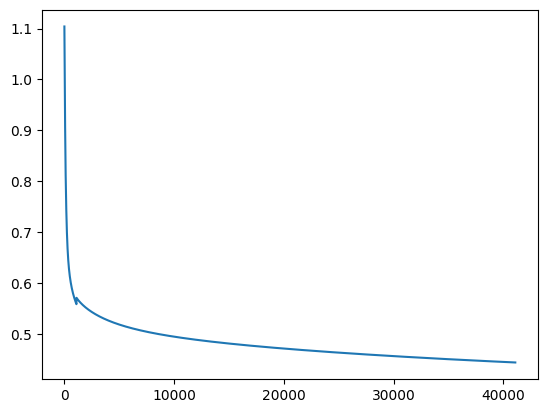

In [124]:
# FIXME

In [ ]:
# FIXME

Now display the accuracy score

In [ ]:
# FIXME